# Titanic Data Analysis

The data set which I am going to explore contains the information gathered from 891 of the 2224 passengers and crew on board the Titanic. The Data set has various columns like 
- Survival
- Pclass(Ticket class)
- Sex
- Age
- Sibsp(# of siblings / spouses aboard the Titanic)
- Parch(# of parents / children aboard the Titanic)
- Ticket(Ticket Number)
- Fare
- Cabin(cabin Number)
- Embarked (port of Embarkation).   

## Loading Data From Csv

For importing data from csv, pandas has a built in function which reads the information into a dataframe. 

In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Overall Metrics

The information has a column called 'survived' whose values are either 0 or 1, using this column we can count the total number of deaths and survivors.

In [2]:
total_no_passengers = len(titanic_data['PassengerId'])
survival_data = titanic_data['Survived']
survivied = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

print('------------------------------------------')
print('Total number of passengers on board: ',total_no_passengers)
print('Total number of survivors: ',survivied)
print('Total number of casualties: ',casualties)
print('------------------------------------------')

------------------------------------------
Total number of passengers on board:  891
Total number of survivors:  342
Total number of casualties:  549
------------------------------------------


- The following pie chart shows the distribution of survivors and deaths

Populating the interactive namespace from numpy and matplotlib


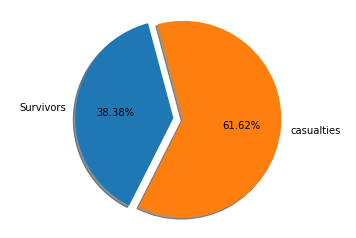

In [3]:
%pylab inline
import matplotlib.pyplot as plt

def drawPieChart(labels,sizes,explode,startangle):
    plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=startangle) 
    plt.axis('equal')
    plt.show()
    
drawPieChart(['Survivors', 'casualties'],[survivied,casualties],(0.1, 0),105)    

## Overall Metrics By Gender

The above metrics show the total number of survivors and casualties, now let us explore these metrics based on the gender.
Using the groupby function on dataframe based on the gender, we can count the total number of female and male survivors. when we calulate female survivors and male survivors in terms of percentages with respect to total survivors  , we find that female survivors constitute (68.13%) and male survivors constitute (31.87%). Using this information, we can conclude that females where given more preference in using life saving materials like life boats, etc.



In [4]:
male_count = (titanic_data['Sex'] == 'male').sum()
female_count = (titanic_data['Sex'] == 'female').sum()
group_by_gender = titanic_data.groupby('Sex').sum()['Survived']
male_survivors = group_by_gender['male']
female_survivors = group_by_gender['female']
male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors

print('-------------------------------------')
print('Total number of males: ',male_count)
print('Total number of male survivors: ',male_survivors)
print('Total number of male casualties: ',male_casualties)
print('--------------------------------------')
print('Total number of females: ',female_count)
print('Total number of female survivors: ',female_survivors)
print('Total number of female casualties: ',female_casualties)
print('--------------------------------------')

-------------------------------------
Total number of males:  577
Total number of male survivors:  109
Total number of male casualties:  468
--------------------------------------
Total number of females:  314
Total number of female survivors:  233
Total number of female casualties:  81
--------------------------------------


- The following pie chart shows the distribution of male and female survivors

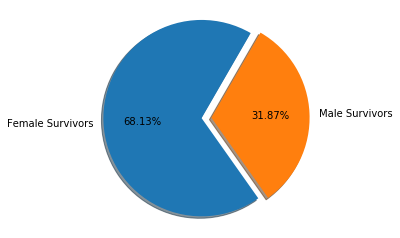

In [5]:
drawPieChart(['Female Survivors', 'Male Survivors'],[female_survivors,male_survivors],(0.1, 0),60)

## Explore Casualties based on Pclass

Let us exlpore the Casualties based on Pclass(A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower) to see whether passengers were given priority based on their class. Now Lets explore some metrics related to Pclass.


In [6]:
pclass = titanic_data['Pclass']
pclass_1 = (pclass == 1).sum()
pclass_2 = (pclass == 2).sum()
pclass_3 = (pclass == 3).sum()

pclass_1_survivors = ((pclass == 1)&(survival_data == 1)).sum()
pclass_1_casualties = ((pclass == 1)&(survival_data == 0)).sum()

pclass_2_survivors = ((pclass == 2)&(survival_data == 1)).sum()
pclass_2_casualties = ((pclass == 2)&(survival_data == 0)).sum()

pclass_3_survivors = ((pclass == 3)&(survival_data == 1)).sum()
pclass_3_casualties = ((pclass == 3)&(survival_data == 0)).sum()

print('----------------------------------')
print('Pclass 1 Metrics: ')
print('Total Number Of People: ',pclass_1)
print('Total Number Of Survivors: ',pclass_1_survivors)
print('Total Number Of casualties: ',pclass_1_casualties)
print('Survival Rate: {0}%'.format(round((pclass_1_survivors/pclass_1)*100.0,2)))
print('----------------------------------')

print('Pclass 2 Metrics: ')
print('Total Number Of People: ',pclass_2)
print('Total Number Of Survivors: ',pclass_2_survivors)
print('Total Number Of casualties: ',pclass_2_casualties)
print('Survival Rate: {0}%'.format(round((pclass_2_survivors/pclass_2)*100.0,2)))
print('----------------------------------')

print('Pclass 3 Metrics: ')
print('Total Number Of People: ',pclass_3)
print('Total Number Of Survivors: ',pclass_3_survivors)
print('Total Number Of casualties: ',pclass_3_casualties)
print('Survival Rate: {0}%'.format(round((pclass_3_survivors/pclass_3)*100.0,2)))
print('----------------------------------')

----------------------------------
Pclass 1 Metrics: 
Total Number Of People:  216
Total Number Of Survivors:  136
Total Number Of casualties:  80
Survival Rate: 62.96%
----------------------------------
Pclass 2 Metrics: 
Total Number Of People:  184
Total Number Of Survivors:  87
Total Number Of casualties:  97
Survival Rate: 47.28%
----------------------------------
Pclass 3 Metrics: 
Total Number Of People:  491
Total Number Of Survivors:  119
Total Number Of casualties:  372
Survival Rate: 24.24%
----------------------------------


- From the above listed metrics, we can say that people from upper class(pclass = 1) were given priority as they had the highest survival rate of (62.96%) which is greater than the survival rates of both middle class and lower class. Lets plot a histogram of casualties to get a more precise picture

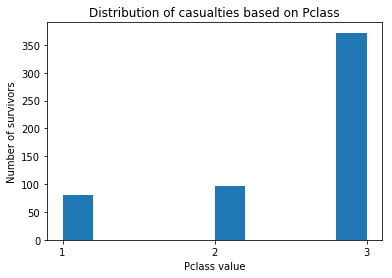

In [140]:
pclass_casualties = pclass[survival_data == 0]

def drawHistogram(data,title,xlabel,ylabel,xticks=None,yticks=None,bins=None,color=None):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks != None :
        plt.xticks(xticks)
    if yticks != None :
        plt.yticks(yticks)
    plt.hist(data,bins=bins,color=color)
    plt.show()

drawHistogram(pclass_casualties,'Distribution of casualties based on Pclass',
              'Pclass value','Number of survivors',range(1,4))

- The Histogram above shows the distribution of casualties based on their pclass, as we can observe that lower class has the   most number of casualties when compared to upper class and middle class. So, Now we can say that lower class people got the   least priority for life saving materials like life boats, etc. 

## Explore Survivors And Casualties Based On Age

- In this part of data exploration, I want to check whether did age played any role in survival.
- As a first step towards the Age data exploration, Lets take a look at age data for any anomalies.

In [8]:
titanic_data[['PassengerId','Survived','Name','Sex','Age']].head(7)

,PassengerId,Survived,Name,Sex,Age
0,1,0,"Braund, Mr. Owen Harris",male,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,"Allen, Mr. William Henry",male,35.0
5,6,0,"Moran, Mr. James",male,NaN
6,7,0,"McCarthy, Mr. Timothy J",male,54.0


- As we see that row number 5 contains NaN for Age column data,We need to drop all these values before taking the age data into consideration 
- Now lets take a look at some metrics for Age data.

In [9]:
age_data = titanic_data['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

oldest_to_survive = survived_age_data.max()
youngest_to_survive = survived_age_data.min()

oldest_to_die = casualties_age_data.max()
youngest_to_die = casualties_age_data.min()

mean_age_survivors = survived_age_data.mean()
mean_age_casualties = casualties_age_data.mean()

print('------------------------------')
print('Oldest To Survive: ',oldest_to_survive)
print('Youngest To Survive: ',youngest_to_survive)
print('------------------------------')
print('Oldest To die: ',oldest_to_die)
print('Youngest To die: ',youngest_to_die)
print('------------------------------')
print('Mean Age Of Survivors: ',round(mean_age_survivors,2))
print('Mean Age Of Casualties: ',round(mean_age_casualties,2))
print('------------------------------')

------------------------------
Oldest To Survive:  80.0
Youngest To Survive:  0.42
------------------------------
Oldest To die:  74.0
Youngest To die:  1.0
------------------------------
Mean Age Of Survivors:  28.34
Mean Age Of Casualties:  30.63
------------------------------


- Now lets plot the Age data of both the survivors and casualties to see whether any particular age group was given             preference. 

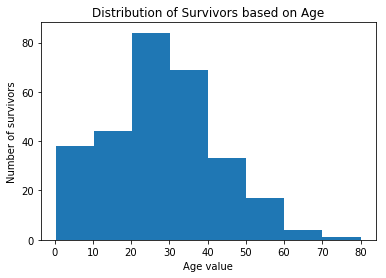

In [142]:
drawHistogram(survived_age_data,'Distribution of Survivors based on Age',
              'Age value','Number of survivors',yticks=range(0,120,20),bins=8)

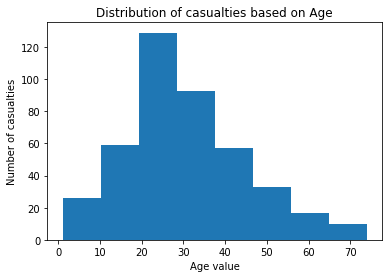

In [48]:
drawHistogram(casualties_age_data,'Distribution of casualties based on Age',
              'Age value','Number of casualties',bins=8)

- When we observe distribution of age data, Even though we see a slight bump in data at age [0 - 10] of survivors when compared to the age data of casualties, We cannot say or conclude that children might have got some preference because there is not much difference between the total no of survivors and casulaties who were of age less than 10. 

- Lets explore the data of few passengers who were of age less than 10 and did not survive.


In [260]:
child_casualties_data = titanic_data[(age_data < 10) & (survival_data == 0)]
child_casualties_data.head(10)[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch']]

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,349909,1
16,17,0,"Rice, Master. Eugene",male,2.0,382652,1
24,25,0,"Palsson, Miss. Torborg Danira",female,8.0,349909,1
50,51,0,"Panula, Master. Juha Niilo",male,7.0,3101295,1
63,64,0,"Skoog, Master. Harald",male,4.0,347088,2
119,120,0,"Andersson, Miss. Ellis Anna Maria",female,2.0,347082,2
147,148,0,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,W./C. 6608,2
164,165,0,"Panula, Master. Eino Viljami",male,1.0,3101295,1
171,172,0,"Rice, Master. Arthur",male,4.0,382652,1
182,183,0,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,347077,2


- Based upon above data, Lets explore the data of family members of these children. To explore the family data we need to take ticket value into consideration, as people might have booked tickets under same ticket value for all their family members.

In [291]:
ticket_data = titanic_data['Ticket']
ticket_bool = (ticket_data == '349909')|(ticket_data == '382652')|(ticket_data == '347088')|(ticket_data == '3101295')
titanic_data[(age_data > 10) &(ticket_bool) ].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


- The above data shows that none of their family members survived.
- Now lets explore the data related to children who survived and were of age less than 10.

In [276]:
child_survivors_data = titanic_data[(age_data < 10) & (survival_data == 1)]
child_survivors_data.head(10)[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch']]

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.00,PP 9549,1
43,44,1,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,SC/Paris 2123,2
58,59,1,"West, Miss. Constance Mirium",female,5.00,C.A. 34651,2
78,79,1,"Caldwell, Master. Alden Gates",male,0.83,248738,2
165,166,1,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,363291,2
172,173,1,"Johnson, Miss. Eleanor Ileen",female,1.00,347742,1
183,184,1,"Becker, Master. Richard F",male,1.00,230136,1
184,185,1,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,315153,2
193,194,1,"Navratil, Master. Michel M",male,3.00,230080,1
233,234,1,"Asplund, Miss. Lillian Gertrud",female,5.00,347077,2


- Now lets explore the data of fmaily members related to these children.

In [288]:
ticket_bool = (ticket_data == '248738')|(ticket_data == 'SC/Paris 2123')|(ticket_data == '363291')|(ticket_data == '347077')|(ticket_data == 'C.A. 34651')
titanic_data[(age_data > 10)  &(ticket_bool) ].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C


- The above data shows the data related to family members of the childeren who survived the diaster. The data shows that males din't survive the disaster. Probably now we can relate to the fact that female and children were given preference.
- The others facts that we can produce from the data are like, if family didn't get a chance to survive, then in that case whole family died including children 
- If in case some how family got a chance to survive then females and children were given preference.
- Another interesting fact is that children who were of age less than 1 survived the disaster.

In [292]:
titanic_data[(age_data < 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Explore Survivors And Casualties Based On Parch
- Lets explore the Parch data see whether family relations played any role in passenger survival.
- Now lets a take a look at parch data of the passengers.

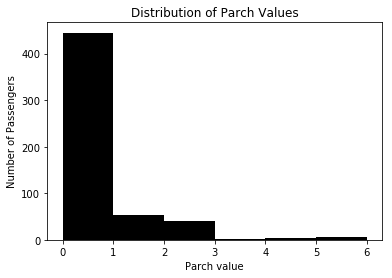

In [231]:
parch_data = titanic_data['Parch']
survived_parch_data = parch_data[survival_data==1]
casualties_parch_data = parch_data[survival_data==0]

drawHistogram(casualties_parch_data,'Distribution of Parch Values',
              'Parch value','Number of Passengers',bins=6,color='k')

- The above Histogram shows that most of the passengers had parch value as 'Zero', i.e, they travelled alone and din't had any dependents.  